In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [2]:
df = pd.read_csv("automobile.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [4]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [5]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [6]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [7]:
df["price"] = df["price"].replace("?", np.nan)

In [8]:
df["price"] = pd.to_numeric(df["price"])

In [9]:
df["normalized-losses"] = df["normalized-losses"].replace("?", np.nan)

In [10]:
df["normalized-losses"] = pd.to_numeric(df["normalized-losses"])

C:\Users\Razi\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


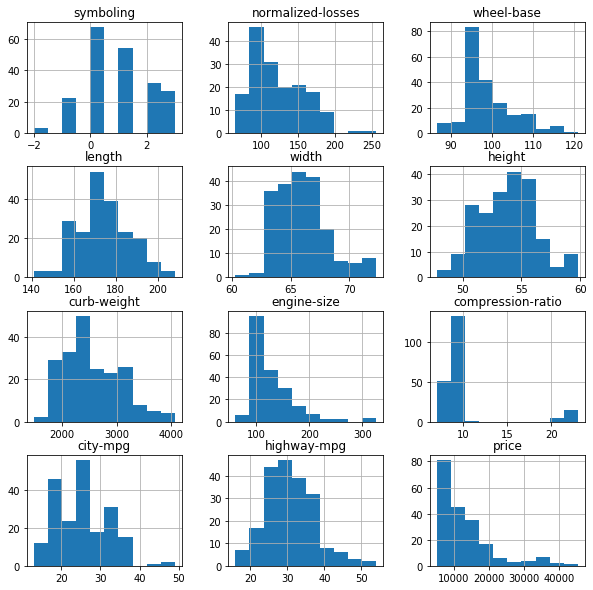

In [11]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

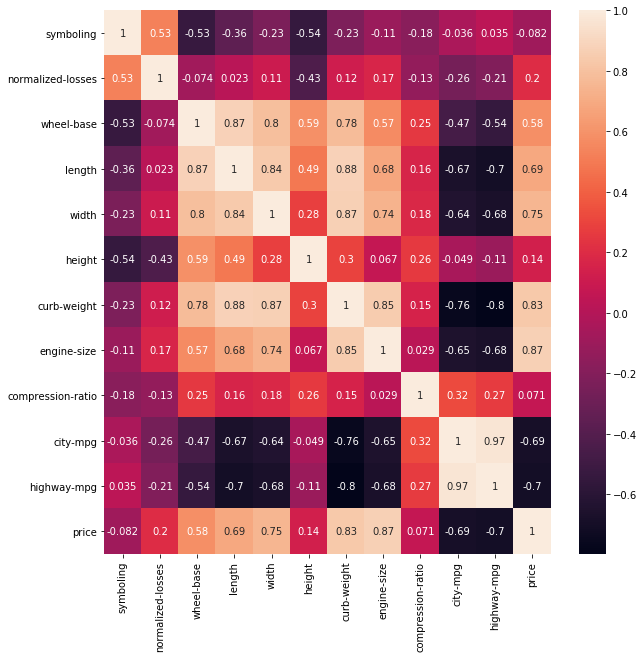

In [12]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)
plt.show()

C:\Users\Razi\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


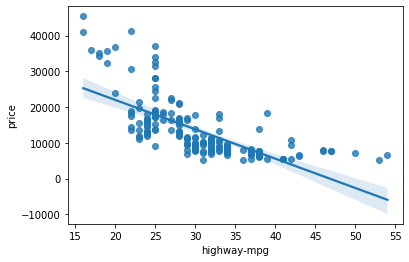

In [13]:
sns.regplot(df["highway-mpg"], df["price"])

C:\Users\Razi\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


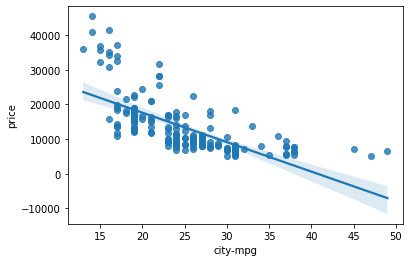

In [14]:
sns.regplot(df["city-mpg"], df["price"])

C:\Users\Razi\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


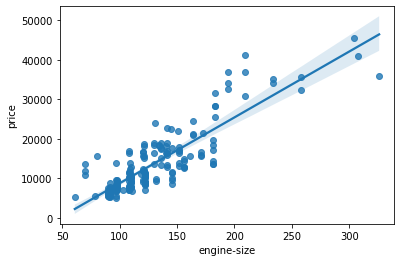

In [15]:
sns.regplot(df["engine-size"], df["price"])

C:\Users\Razi\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


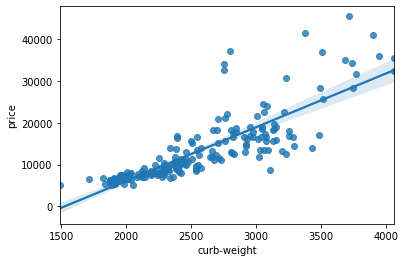

In [16]:
sns.regplot(df["curb-weight"], df["price"])

C:\Users\Razi\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


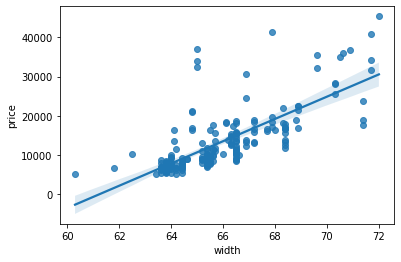

In [17]:
sns.regplot(df["width"], df["price"])

C:\Users\Razi\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


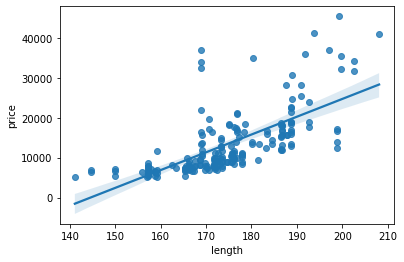

In [18]:
sns.regplot(df["length"], df["price"])

In [19]:
num_features = [col for col in df.columns if df[col].dtypes in ("int64", "float64")]
print(num_features)

['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'compression-ratio', 'city-mpg', 'highway-mpg', 'price']


In [20]:
selected_num_features = ["length", "width", "curb-weight", "engine-size", "city-mpg", "highway-mpg"]

In [21]:
cat_features = [col for col in df.columns if df[col].dtypes=="object"]
print(cat_features)

['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system', 'bore', 'stroke', 'horsepower', 'peak-rpm']


In [22]:
df["make"].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
audi              7
saab              6
porsche           5
isuzu             4
alfa-romero       3
chevrolet         3
jaguar            3
renault           2
mercury           1
Name: make, dtype: int64

In [23]:
df["fuel-type"].value_counts()

gas       185
diesel     20
Name: fuel-type, dtype: int64

In [24]:
df["aspiration"].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [25]:
df["num-of-doors"].value_counts()

four    114
two      89
?         2
Name: num-of-doors, dtype: int64

In [26]:
df["num-of-doors"] = df["num-of-doors"].replace("?", np.nan)
df["num-of-doors"].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [27]:
df["body-style"].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [28]:
df["drive-wheels"].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

In [29]:
df["engine-location"].value_counts()

front    202
rear       3
Name: engine-location, dtype: int64

In [30]:
df["engine-type"].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine-type, dtype: int64

In [31]:
df["num-of-cylinders"].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: num-of-cylinders, dtype: int64

In [32]:
df["fuel-system"].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

In [33]:
selected_cat_features = ["make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", \
                        "engine-type", "num-of-cylinders", "fuel-system"]

In [34]:
all_features = selected_cat_features + selected_num_features
df_full = df[all_features].copy()
df_full["price"] = df["price"]

In [35]:
df_full.isnull().sum()

make                0
fuel-type           0
aspiration          0
num-of-doors        2
body-style          0
drive-wheels        0
engine-location     0
engine-type         0
num-of-cylinders    0
fuel-system         0
length              0
width               0
curb-weight         0
engine-size         0
city-mpg            0
highway-mpg         0
price               4
dtype: int64

In [36]:
df_full.dropna(axis=0, inplace=True)

In [37]:
X = df_full.drop("price", axis=1)
y = df_full["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("X_test:", y_test.shape)

X_train: (139, 16)
X_test: (60, 16)
y_train: (139,)
X_test: (60,)


In [38]:
cat_transformer = Pipeline(steps=[("onehot", OneHotEncoder(handle_unknown="ignore"))])
num_transformer = Pipeline(steps=[("scaler", MinMaxScaler())])

preprocessor = ColumnTransformer(transformers=[
    ("cat", cat_transformer, selected_cat_features),
    ("num", num_transformer, selected_num_features)
])

In [39]:
lin_reg = LinearRegression()

In [40]:
my_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", lin_reg)
])

my_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessing',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat',
                                                  Pipeline(memory=None,
                                                           steps=[('onehot',
                                                                   OneHotEncoder(categories='auto',
                                                                                 drop=None,
                                                                                 dtype=<class 'numpy.float64'>,
                                                                                 handle_unknown='ignore',
                                                                                 sparse=True))],
                                               

In [41]:
y_pred = my_pipeline.predict(X_test)

In [42]:
score = r2_score(y_test, y_pred)
print(score)

0.9138419828879686


<H3>Test Model

In [43]:
df_full.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,length,width,curb-weight,engine-size,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,168.8,64.1,2548,130,21,27,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,168.8,64.1,2548,130,21,27,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,171.2,65.5,2823,152,19,26,16500.0
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,176.6,66.2,2337,109,24,30,13950.0
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,176.6,66.4,2824,136,18,22,17450.0


In [60]:
X_new = [["audi", "gas", "std", "four", "sedan", "4wd", "front", "ohc", "four", "mpfi", 176.6, 66.4, 2337, 109, 25, 28]]

new_df = pd.DataFrame(X_new, columns=["make","fuel-type","aspiration","num-of-doors","body-style","drive-wheels",\
                                      "engine-location","engine-type","num-of-cylinders","fuel-system","length",\
                                      "width","curb-weight","engine-size","city-mpg","highway-mpg"])

pred = my_pipeline.predict(new_df)
print(pred)

[12872.94443182]


<h3>Using Gradient Boosting to further improve

In [67]:
grbt = GradientBoostingRegressor(max_depth=6, learning_rate=0.1, n_estimators=300)
my_pipeline_grbt = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model_grbt", grbt)
])

my_pipeline_grbt.fit(X_train, y_train)
y_pred_grbt = my_pipeline_grbt.predict(X_test)
score_grbt = r2_score(y_test, y_pred_grbt)
print(score_grbt)

0.9324776843066502


In [70]:
X_new = [["audi", "gas", "std", "four", "sedan", "4wd", "front", "ohc", "four", "mpfi", 176.6, 66.4, 2337, 109, 25, 28]]

new_df = pd.DataFrame(X_new, columns=["make","fuel-type","aspiration","num-of-doors","body-style","drive-wheels",\
                                      "engine-location","engine-type","num-of-cylinders","fuel-system","length",\
                                      "width","curb-weight","engine-size","city-mpg","highway-mpg"])

pred_grbt = my_pipeline_grbt.predict(new_df)
print(pred_grbt)

[13413.58937504]


The model has improved from its previous runs. It can be further improved by using GridSearchCV